In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import pydae.svg_tools as svgt
%config InlineBackend.figure_format = 'svg'

In [2]:
from pydae import ssa
from washout import washout_class

In [3]:
syst = washout_class()

In [4]:

syst.initialize([{    # parameters setting
                   # initial desired angle = 0º
                }],1)                  # here -1 means that -1 is considered as initial gess for
                                        # dynamic and algebraic states

True

In [5]:
syst.report_y()

z_wo  =  0.00


In [6]:
syst.simulate([{'t_end':1.0, 'u_wo':0.0, 'T_wo':10},
               {'t_end':5.0, 'u_wo':1.0}],0);

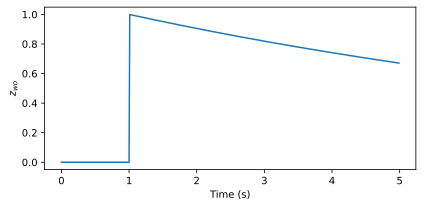

In [7]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 3), dpi=100)

axes.plot(syst.T, syst.get_values('z_wo'), label=f'z_wo')
axes.set_ylabel('$z_{wo}$')
axes.set_xlabel('Time (s)')
fig.tight_layout()

In [15]:
Δt = 0.001
syst = washout_class()
times = np.arange(0,15,Δt)
syst.initialize([{'u_wo':0.0, 'T_wo':5.0}],0)

for t in times:
    syst.run([{'t_end':t,'u_wo':np.sin(1*np.pi*2*t)+0.5}])
    
syst.post();


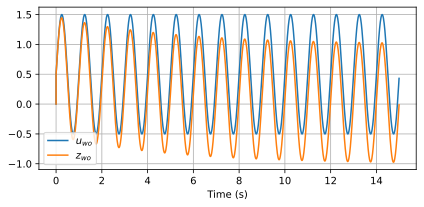

In [16]:
fig, axes = plt.subplots(nrows=1,ncols=1, figsize=(6, 3), dpi=100)

axes.plot(syst.T, syst.get_values('u_wo'), label=f'$u_{{wo}}$')
axes.plot(syst.T, syst.get_values('z_wo'), label=f'$z_{{wo}}$')
axes.legend()
axes.set_xlabel('Time (s)')
axes.grid()
fig.tight_layout()

In [10]:
syst.report_params()

T_l   =  0.01
Alpha_l =  0.10
